# Exploring Dandiset 001375: Septum GABA Disruption with DREADDs

*A Reanalysis Starter Notebook generated with AI assistance*

---

**Caution:** This notebook was generated with the assistance of AI (GPT-4) using metadata and code patterns from Dandiset 001375. Please review all code and results carefully before relying on any interpretations or reusing code for downstream analyses.

## Overview

This notebook offers an introduction to [Dandiset 001375](https://dandiarchive.org/dandiset/001375/0.250406.1855):  
**"Septum GABA disruption with DREADDs"**.  

This dataset presents a pilot study exploring the effects of disrupting medial septal GABAergic interneurons (via DREADDs) on hippocampal and neocortical electrophysiological activity in mice performing virtual navigation tasks.  

The data comprises high-density electrophysiological recordings and spike sorting results, as well as trial structure and metadata in NWB format.

---

**In this notebook you will learn:**
1. What data are available in this Dandiset and how the NWB files are organized.
2. How to access and load data from the DANDI Archive using Python, `dandi`, and `pynwb`, with examples that stream the remote file.
3. How to inspect electrode, trial, and unit (spike) data.
4. How to create basic visualizations of session and unit activity.

The workflow here is intended as a starting point for more advanced reanalysis projects.

## Required Packages

This notebook requires the following Python packages (assumed already installed):

- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `matplotlib`
- `pandas`
- `numpy`

If you have not installed these packages, please do so before running the notebook.

---

Now, let's begin by exploring the data and accessing the assets on DANDI.

In [1]:
# Import libraries for data access and visualization
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Connect to DANDI and List Dataset Assets

First, let's use the DANDI API to connect to the Dandiset and list available NWB files.
For illustration, we'll focus on the file:  
`sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`

In [2]:
# Connect to DANDI and get the Dandiset
dandiset_id = "001375"
version = "0.250406.1855"

client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, version)

# List all file paths in the Dandiset
nwb_paths = [a.path for a in dandiset.get_assets() if a.path.endswith('.nwb')]
print("Available NWB files in this dandiset:")
for path in nwb_paths:
    print("-", path)

Available NWB files in this dandiset:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb


For demonstration, we'll work with:

`sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`

This file contains data from mouse "MS13B" navigating a virtual hallway, with GABAergic neurons in the medial septum manipulated using DREADDs.

## Streaming and Loading NWB Data

To avoid large downloads, we leverage `remfile` and `h5py` to access remote NWB data streams.  
We'll use `pynwb.NWBHDF5IO` for high-level access.  
(No file will be saved to disk.)

**Note:** This approach allows efficient inspection of large datasets.

In [3]:
# Get the download URL for the target NWB file
target_path = "sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb"
asset = next(dandiset.get_assets_by_glob(target_path))
url = asset.download_url

# Open the file stream without downloading the full file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, "r")
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwbfile = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Session Metadata

Let's examine some basic metadata to understand the context of the recording.

In [4]:
# Display session-level metadata
print("Session ID:", nwbfile.identifier)
print("Session Start:", nwbfile.session_start_time)
print("Session Description:", nwbfile.session_description)
print("Subject ID:", nwbfile.subject.subject_id)
print("Subject Species:", nwbfile.subject.species)
print("Subject Age:", nwbfile.subject.age)
print("Subject Sex:", nwbfile.subject.sex)
print("Subject Description:", nwbfile.subject.description)

Session ID: MS13B
Session Start: 2024-07-25 19:00:00-07:00
Session Description: mouse running laps in virtual hallway
Subject ID: MS13B
Subject Species: Mus musculus
Subject Age: P90D
Subject Sex: M
Subject Description: medial septum DREADD to suppress GABA interneurons


## Electrode Array Structure

The NWB file describes 256 electrodes from two shanks (128 channels each) in the ventral hippocampus and visual cortex.

Let's inspect electrode metadata.

In [5]:
# Convert electrode table to DataFrame and preview
electrodes_df = nwbfile.electrodes.to_dataframe()
print(f"Electrode table shape: {electrodes_df.shape}")
electrodes_df.head()

Electrode table shape: (256, 7)


,x,y,location,filtering,group,group_name,label
id,,,,,,,
0,20.0,1375.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x12894...,shank1,shank1-electrode001
1,20.0,1325.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x12894...,shank1,shank1-electrode002
2,20.0,1275.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x12894...,shank1,shank1-electrode003
3,20.0,1225.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x12894...,shank1,shank1-electrode004
4,20.0,1175.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x12894...,shank1,shank1-electrode005


### Electrode Locations by Shank

Let's visualize the distribution of electrodes by their assigned shank (group_name) and anatomical location.

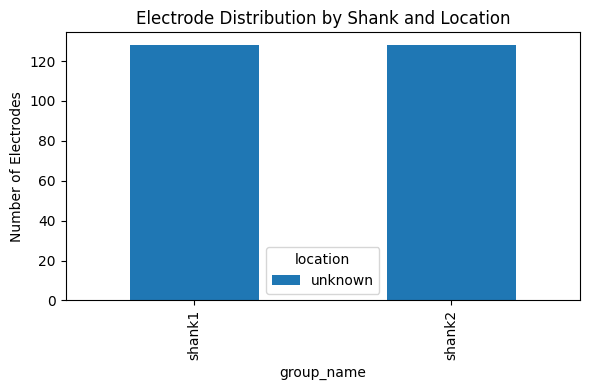

In [6]:
# Plot electrode counts by shank and location
fig, ax = plt.subplots(figsize=(6,4))
shank_counts = electrodes_df.groupby(['group_name', 'location']).size().unstack(fill_value=0)
shank_counts.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Number of Electrodes')
ax.set_title('Electrode Distribution by Shank and Location')
plt.tight_layout()
plt.show()

## Trial Structure

The session is organized into 387 trials, representing laps run by the mouse.  
We'll load the trial intervals and visualize trial durations.

In [7]:
# Convert trials to DataFrame
trials_df = nwbfile.trials.to_dataframe()
print(f"Number of trials: {len(trials_df)}")
trials_df.head()

Number of trials: 387


,start_time,stop_time
id,,
0,4.323800,16.929833
1,16.963067,28.414333
2,28.447100,39.402833
3,39.435833,50.027033
4,50.059667,63.064467


### Distribution of Trial Durations

Let's visualize the spread of lap durations during the session.

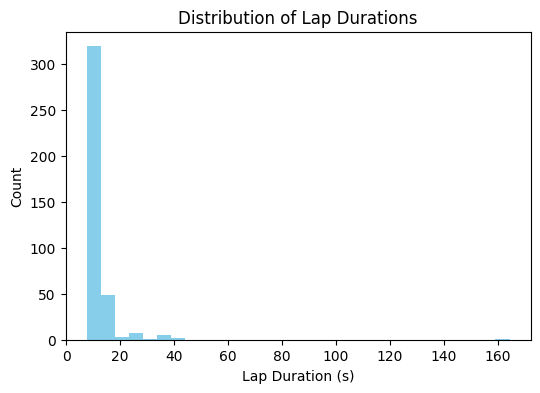

In [8]:
# Plot histogram of trial (lap) durations
durations = trials_df['stop_time'] - trials_df['start_time']
plt.figure(figsize=(6,4))
plt.hist(durations, bins=30, color='skyblue')
plt.xlabel('Lap Duration (s)')
plt.ylabel('Count')
plt.title('Distribution of Lap Durations')
plt.show()

## Raw Electrophysiology Data

The electrophysiology data (`time_series`) contains 144,675,584 samples at 30 kHz for 256 channels.  
Due to file size, let's plot a short snippet from a few electrodes.

Raw data shape: (144675584, 256)
Sampling rate: 30000.0 Hz


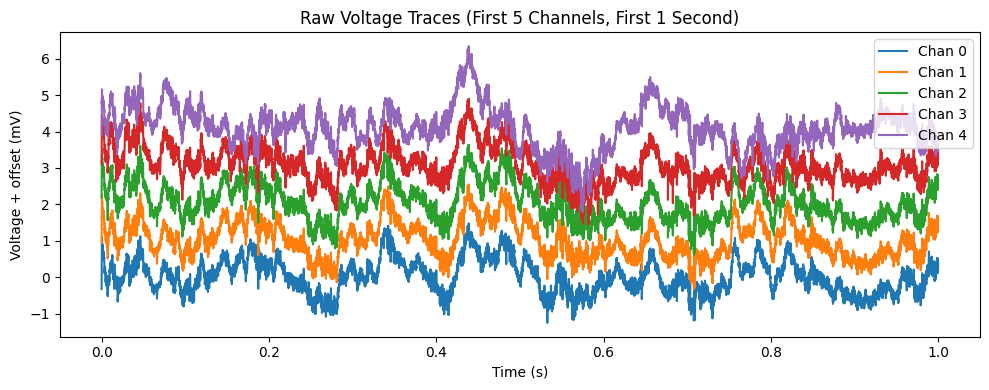

In [9]:
# Preview shape and dtype of raw data
raw_data = nwbfile.acquisition['time_series'].data
print("Raw data shape:", raw_data.shape)
print("Sampling rate:", nwbfile.acquisition['time_series'].rate, "Hz")

# Take a 1-second snippet from the start of 5 electrodes
rate = int(nwbfile.acquisition['time_series'].rate)
snippet = raw_data[:rate, :5]  # (timepoints, 5 channels)

# Plot waveforms
plt.figure(figsize=(10,4))
for i in range(5):
    plt.plot(np.arange(snippet.shape[0]) / rate, snippet[:, i] * 1e-3 + i, label=f'Chan {i}')
plt.xlabel('Time (s)')
plt.ylabel('Voltage + offset (mV)')
plt.title('Raw Voltage Traces (First 5 Channels, First 1 Second)')
plt.legend()
plt.tight_layout()
plt.show()

## Spike Sorting Results

The file contains 33 sorted units.  
Let's inspect spike count and peak firing time distributions.

Number of units: 33


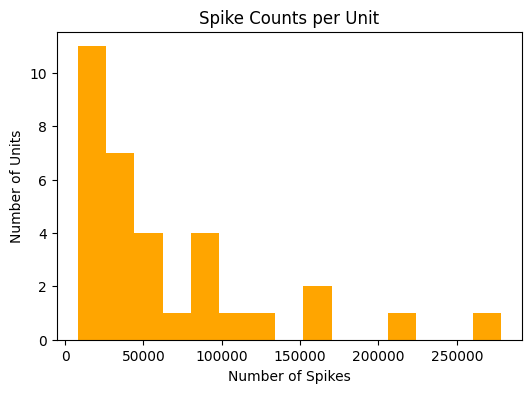

In [10]:
# Access spike times for each unit from the units table
units_df = nwbfile.units.to_dataframe()
print(f"Number of units: {len(units_df)}")
units_df.head()

# Plot histogram of spikes per unit
spike_counts = [len(nwbfile.units.spike_times_index[i]) for i in range(len(units_df))]
plt.figure(figsize=(6,4))
plt.hist(spike_counts, bins=15, color='orange')
plt.xlabel('Number of Spikes')
plt.ylabel('Number of Units')
plt.title('Spike Counts per Unit')
plt.show()

### Raster Plot of Example Units

Let's visualize spike times from a subset of units as a raster plot covering the first 30 seconds of the session.

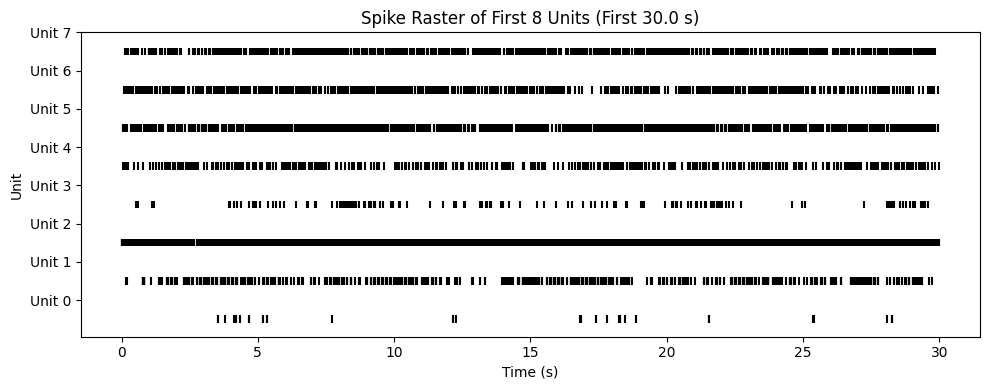

In [11]:
# Choose example units and plot raster for first 30 seconds
num_units_to_show = 8
t_max = 30.0

plt.figure(figsize=(10,4))
for i in range(min(num_units_to_show, len(units_df))):
    spike_times = nwbfile.units.spike_times_index[i]
    spike_times = np.asarray(spike_times)
    spike_times = spike_times[(spike_times >= 0) & (spike_times <= t_max)]
    plt.vlines(spike_times, i + 0.4, i + 0.6, color='black')
plt.xlabel('Time (s)')
plt.ylabel('Unit')
plt.title('Spike Raster of First {} Units (First {} s)'.format(num_units_to_show, t_max))
plt.yticks(range(1, num_units_to_show+1), labels=[f'Unit {i}' for i in range(num_units_to_show)])
plt.tight_layout()
plt.show()

## Summary and Next Steps

In this notebook, you have learned how to:

- Access Dandiset 001375 directly from DANDI.
- Stream and explore NWB files (no full download required).
- Inspect session metadata, electrode geometry, and trial structure.
- Preview raw voltage data and basic sorted spike/unit information.
- Generate visualizations that give an overview of recording structure and data richness.

---

**Possible next steps:**
- Align spikes to behavioral events/trials
- Compute firing rates or population activity
- Analyze spatial patterns across electrode locations
- Delve into detailed LFP or spike-train analyses

Please consult the [DANDI Archive page for Dandiset 001375](https://dandiarchive.org/dandiset/001375/0.250406.1855)  
for more information, or adapt this code to work with other sessions/subjects in the dataset.

---

_End of notebook._